<a href="https://colab.research.google.com/github/Duy76/BTVN/blob/main/Nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/nhan dien hoa

/content/drive/MyDrive/Colab Notebooks/nhan dien hoa


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien hoa/train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 177 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien hoa/validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
6/6 [==============================] - 111s 16s/step - loss: 5.8713 - accuracy: 0.3107 - val_loss: 1.0724 - val_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 1s 197ms/step - loss: 1.0655 - accuracy: 0.3785 - val_loss: 1.0110 - val_accuracy: 0.4444
Epoch 3/100
6/6 [==============================] - 1s 175ms/step - loss: 0.9762 - accuracy: 0.5254 - val_loss: 0.7510 - val_accuracy: 0.6111
Epoch 4/100
6/6 [==============================] - 1s 168ms/step - loss: 0.7711 - accuracy: 0.6384 - val_loss: 0.4188 - val_accuracy: 0.9444
Epoch 5/100
6/6 [==============================] - 1s 178ms/step - loss: 0.5901 - accuracy: 0.7458 - val_loss: 0.2501 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 1s 179ms/step - loss: 0.5248 - accuracy: 0.7514 - val_loss: 0.3097 - val_accuracy: 0.8889
Epoch 7/100
6/6 [==============================] - 1s 173ms/step - loss: 0.4235 - accuracy: 0.8136 - val_loss: 0.1883 - val_accuracy: 0.9444
Epoch 8/100
6

In [ ]:
# Lưu lại
model.save("nhan_dien_hoa.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_hoa.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.003334835870191455
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

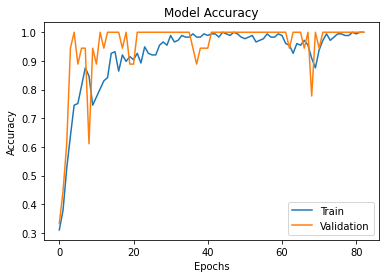

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 254ms/step
cam tu cau


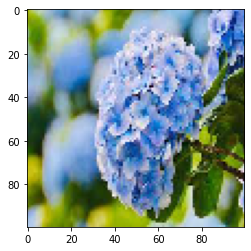

1/1 [==============================] - 0s 20ms/step
cam tu cau


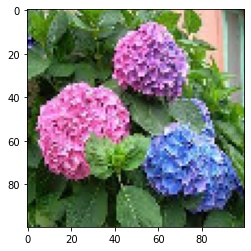

1/1 [==============================] - 0s 30ms/step
cam tu cau


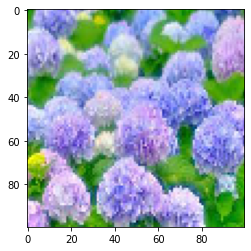

1/1 [==============================] - 0s 29ms/step
cam tu cau


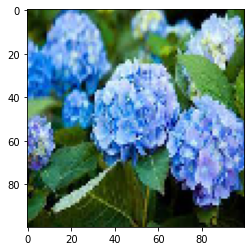

1/1 [==============================] - 0s 16ms/step
cam tu cau


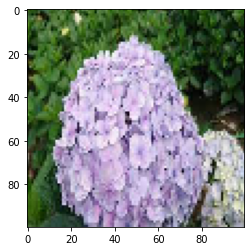

1/1 [==============================] - 0s 24ms/step
cam tu cau


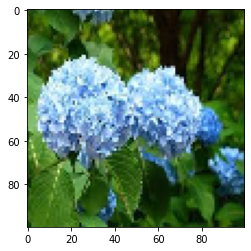

1/1 [==============================] - 0s 19ms/step
hoa cuc


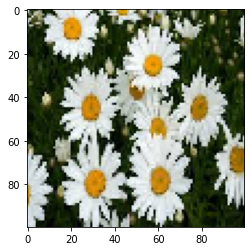

1/1 [==============================] - 0s 19ms/step
hoa cuc


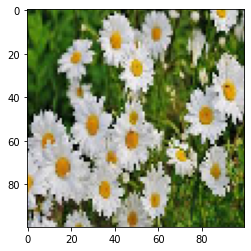

1/1 [==============================] - 0s 16ms/step
hoa cuc


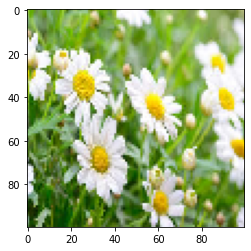

1/1 [==============================] - 0s 18ms/step
hoa cuc


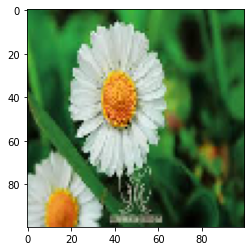

1/1 [==============================] - 0s 18ms/step
hoa cuc


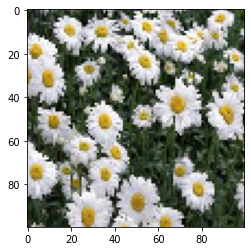

1/1 [==============================] - 0s 16ms/step
hoa cuc


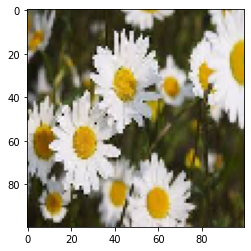

1/1 [==============================] - 0s 15ms/step
hoa lan


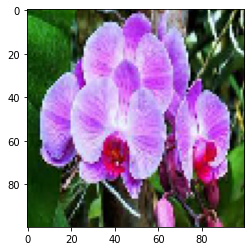

1/1 [==============================] - 0s 17ms/step
hoa lan


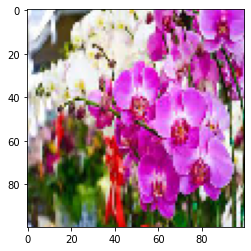

1/1 [==============================] - 0s 17ms/step
hoa lan


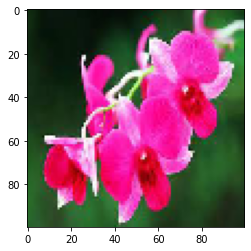

1/1 [==============================] - 0s 16ms/step
hoa lan


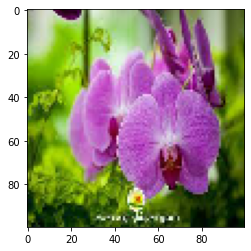

1/1 [==============================] - 0s 17ms/step
hoa lan


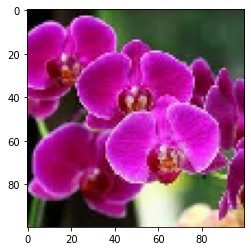

1/1 [==============================] - 0s 20ms/step
hoa lan


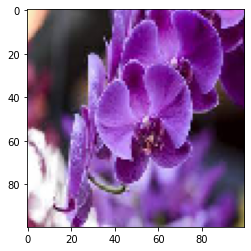

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/nhan dien hoa/test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(100,100))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='cam tu cau'
  if round(result[0][1])==1:
    prediction='hoa cuc'
  if round(result[0][2])==1:
    prediction='hoa lan'
  print(prediction)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
